In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/kidney_disease (1).csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [ ]:
df['classification'].value_counts()

,count
classification,
ckd,248
notckd,150
ckd\t,2


In [ ]:
df.shape

(400, 26)

In [ ]:
df.drop('id',axis=1, inplace=True)

In [ ]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [ ]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [ ]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [ ]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [ ]:
cat_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [ ]:
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [ ]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()}")

red_blood_cells has [nan 'normal' 'abnormal']
pus_cell has ['normal' 'abnormal' nan]
pus_cell_clumps has ['notpresent' 'present' nan]
bacteria has ['notpresent' 'present' nan]
hypertension has ['yes' 'no' nan]
diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary_artery_disease has ['no' 'yes' '\tno' nan]
appetite has ['good' 'poor' nan]
peda_edema has ['no' 'yes' nan]
aanemia has ['no' 'yes' nan]
class has ['ckd' 'ckd\t' 'notckd']


In [ ]:
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no', '\tyes': 'yes', ' yes':'yes'}, inplace=True)
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value = 'no')
df['class'] = df['class'].replace(to_replace={'ckd\t':'ckd', 'notckd': 'not ckd'})

In [ ]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']
for col in cols:
    print(f"{col} has {df[col].unique()}")

diabetes_mellitus has ['yes' 'no' nan]
coronary_artery_disease has ['no' 'yes' nan]
class has ['ckd' 'not ckd']


In [ ]:
df['class'] = df['class'].map({'ckd':0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors = 'coerce')

In [ ]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']
for col in cols:
    print(f"{col} has {df[col].unique()}")

diabetes_mellitus has ['yes' 'no' nan]
coronary_artery_disease has ['no' 'yes' nan]
class has [0 1]


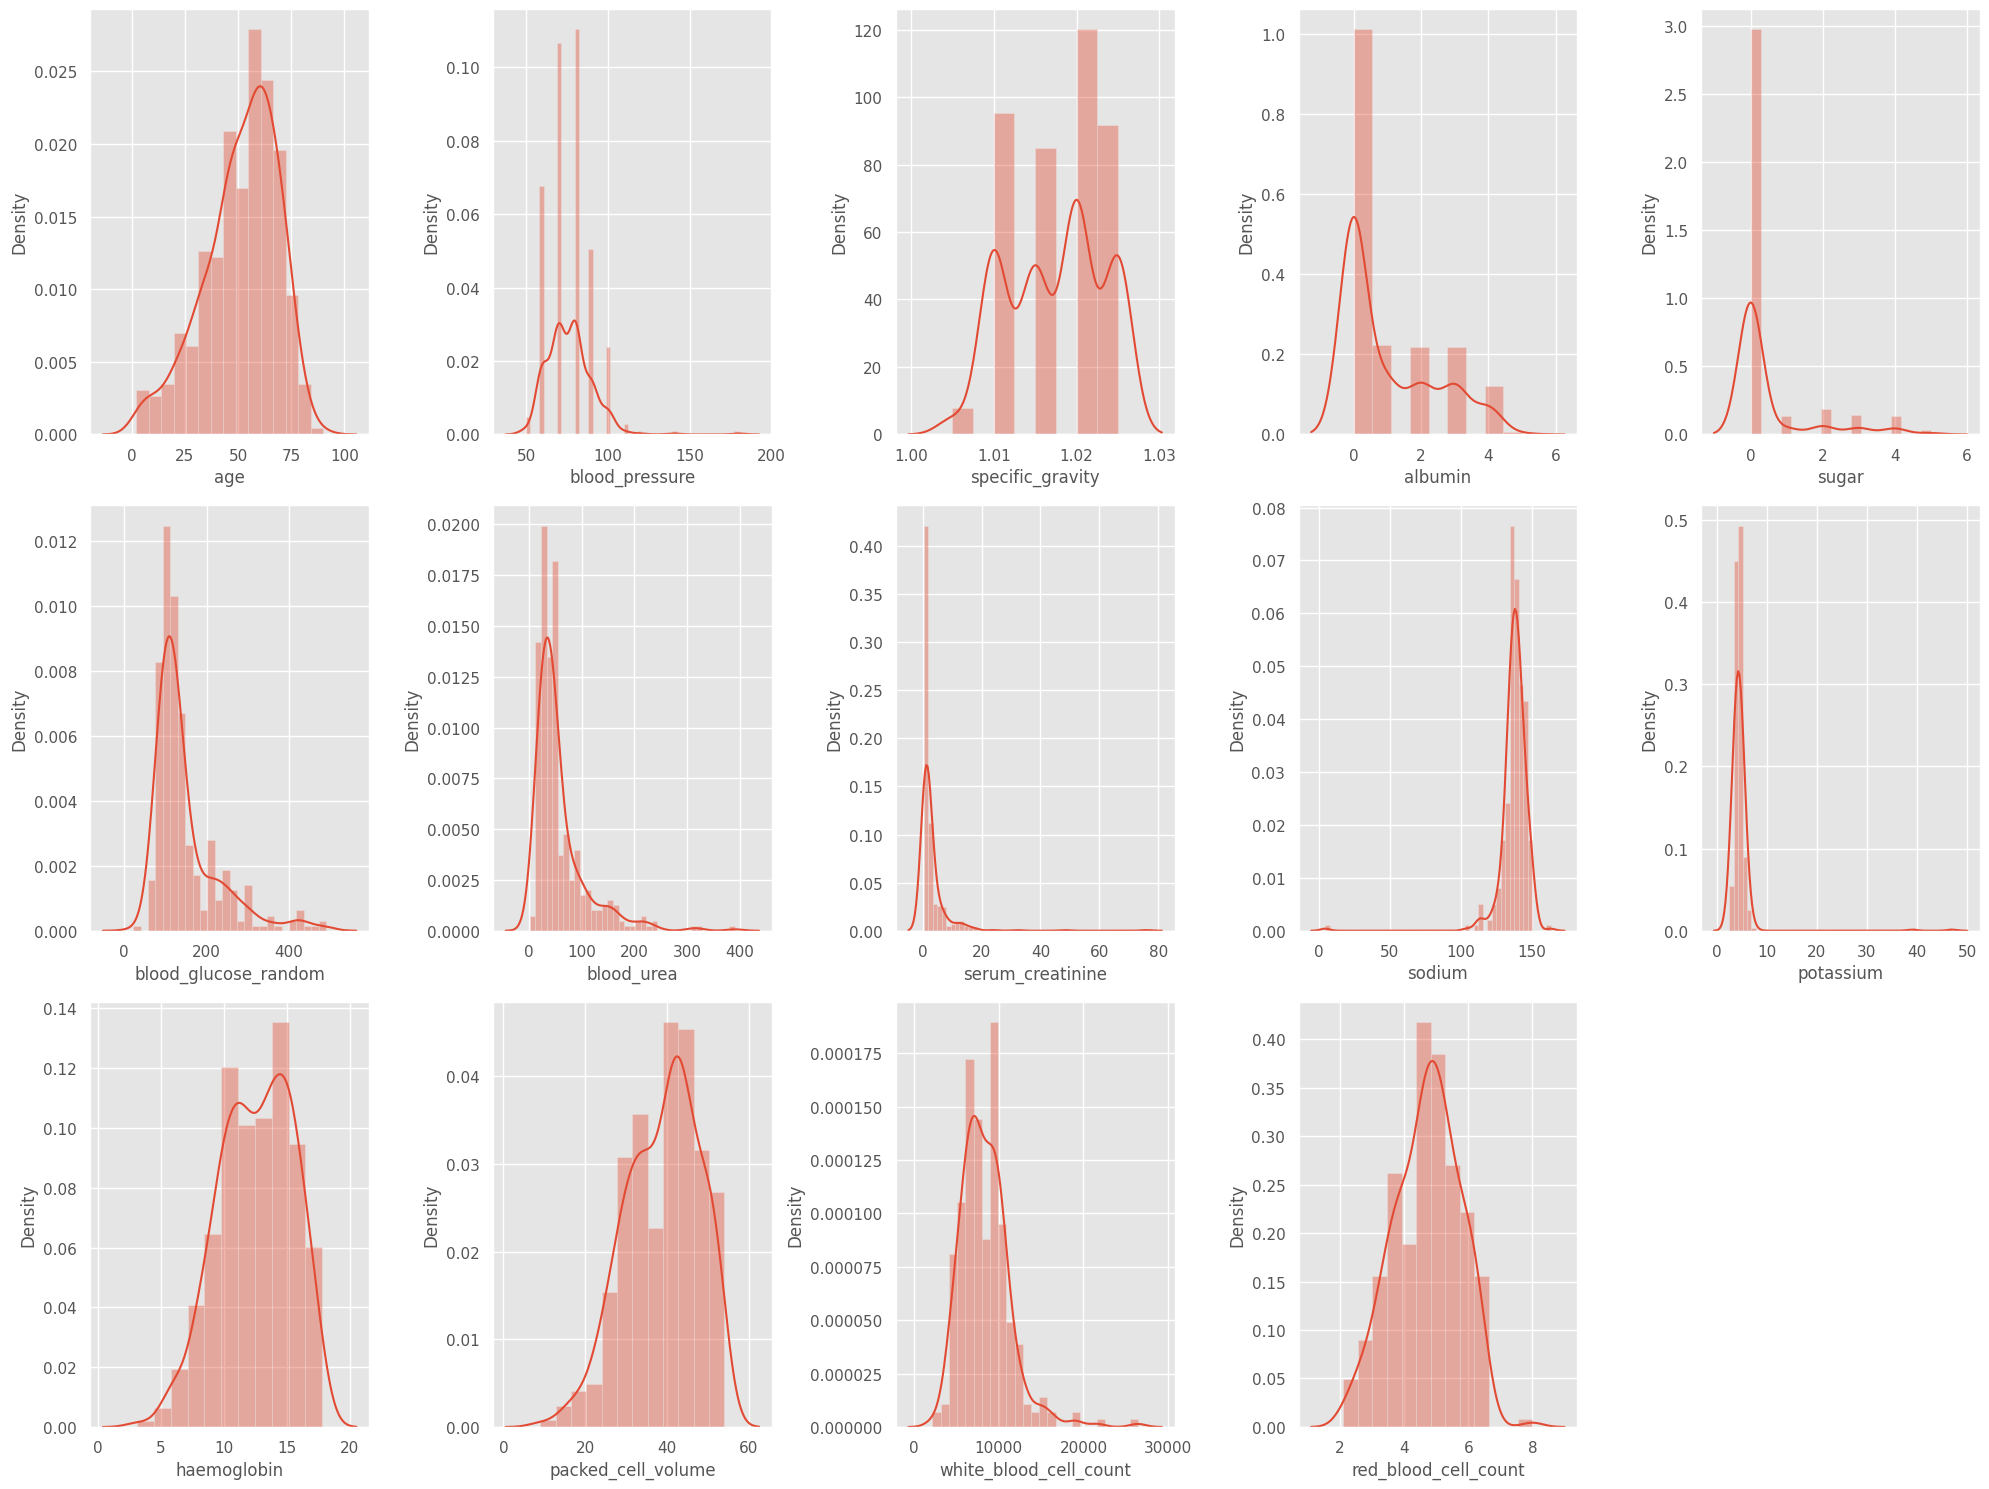

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

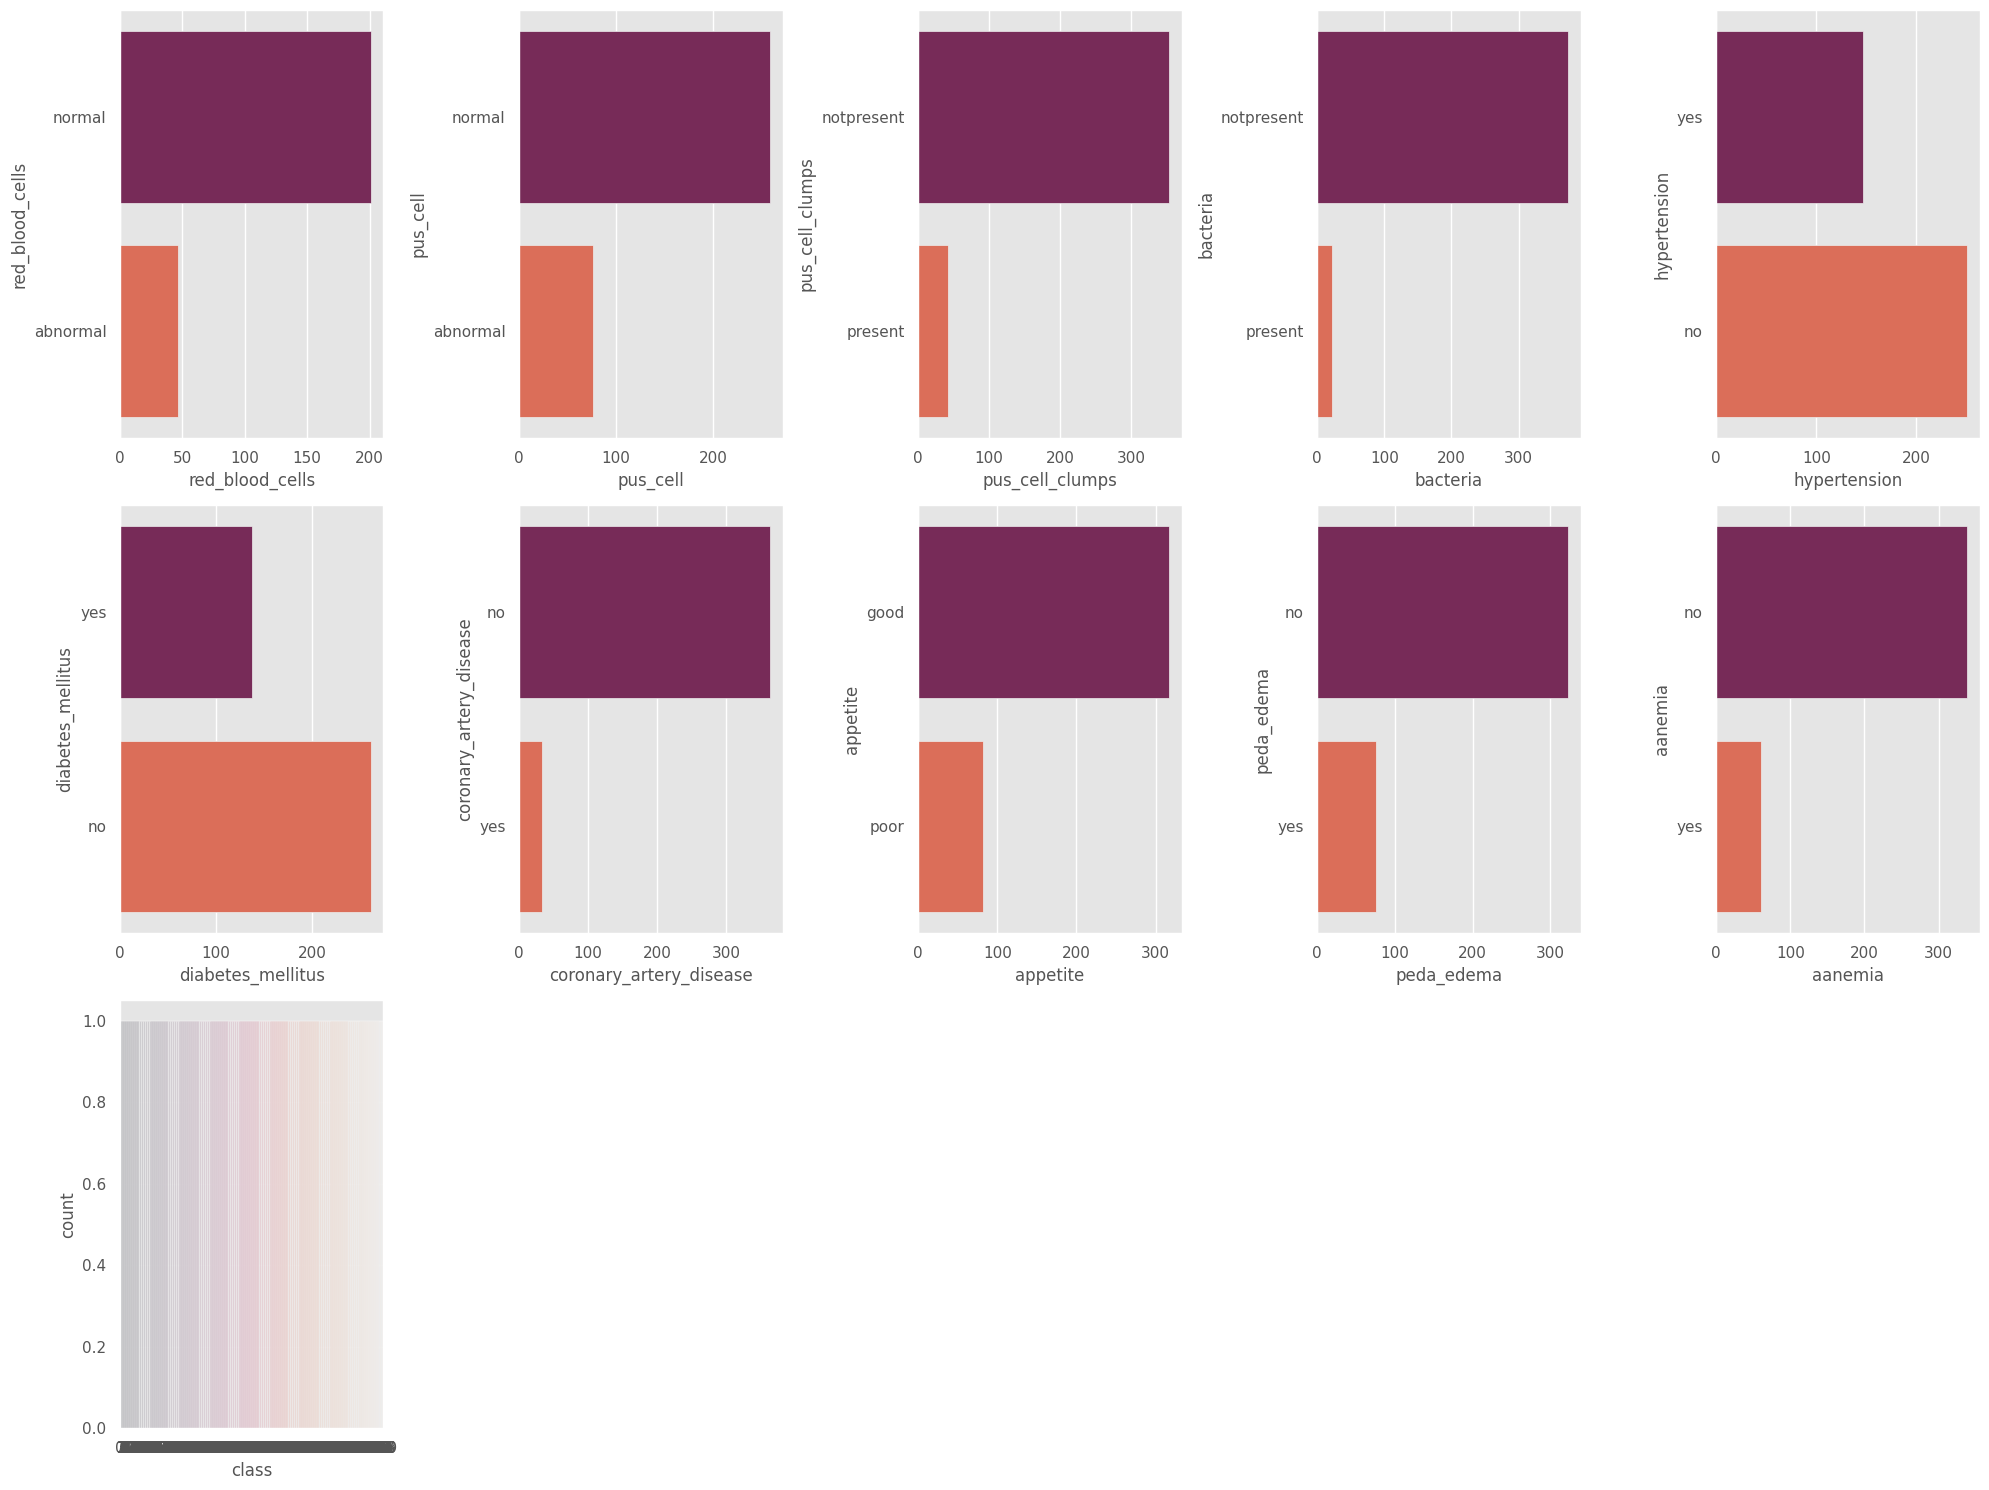

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.countplot(df[column] ,palette = 'rocket')
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
df = pd.get_dummies(df, columns=cat_cols)
df.corr()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,...,coronary_artery_disease_no,coronary_artery_disease_yes,appetite_good,appetite_poor,peda_edema_no,peda_edema_yes,aanemia_no,aanemia_yes,class_0,class_1
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,...,-0.230380,0.233201,-0.166826,0.158928,-0.104076,0.095658,-0.061250,0.051753,0.227268,-0.227268
blood_pressure,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,...,-0.069627,0.086743,-0.170706,0.179118,-0.047173,0.055414,-0.188197,0.198235,0.294077,-0.294077
specific_gravity,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,...,0.142174,-0.175937,0.264228,-0.268958,0.293805,-0.299036,0.236985,-0.243071,-0.732163,0.732163
albumin,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,...,-0.244283,0.269035,-0.350813,0.358095,-0.469381,0.477744,-0.312352,0.321677,0.627090,-0.627090
sugar,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,...,-0.262454,0.280445,-0.084516,0.087941,-0.139608,0.143550,-0.071482,0.075648,0.344070,-0.344070
blood_glucose_random,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,...,-0.208876,0.229575,-0.181519,0.185743,-0.105139,0.109256,-0.135446,0.140579,0.419672,-0.419672
blood_urea,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,...,-0.213447,0.227115,-0.276306,0.278541,-0.342735,0.345496,-0.439291,0.443451,0.380605,-0.380605
serum_creatinine,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,...,-0.181625,0.192671,-0.161260,0.164680,-0.176570,0.180239,-0.235356,0.240025,0.299969,-0.299969
sodium,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,...,0.222661,-0.235355,0.187229,-0.186450,0.170168,-0.169266,0.227073,-0.226902,-0.375674,0.375674
potassium,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,...,-0.007914,0.006265,0.019216,-0.020296,-0.069286,0.068771,-0.115545,0.115518,0.084541,-0.084541


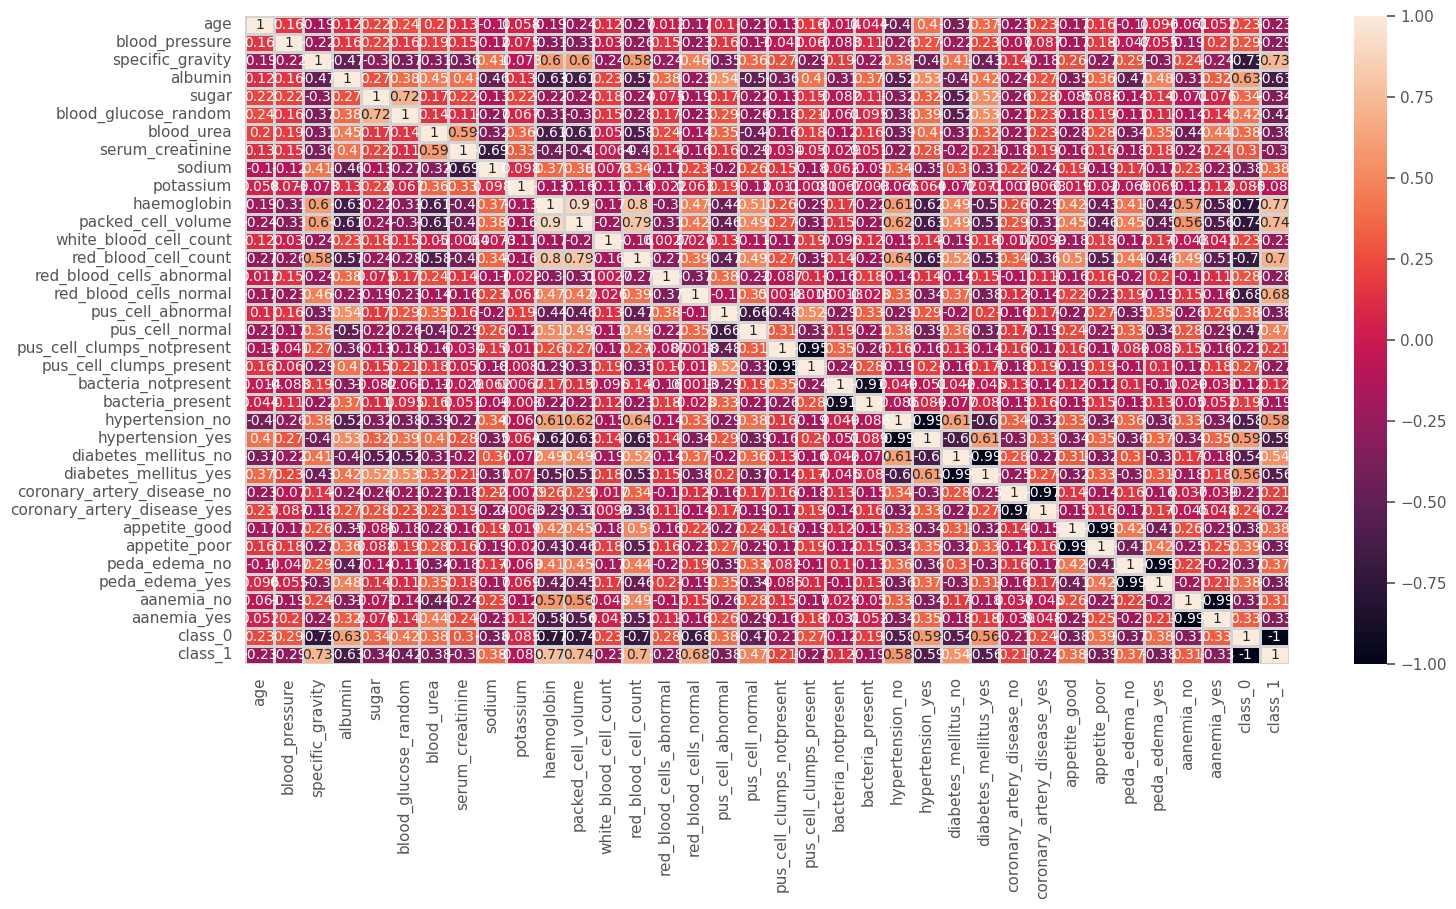

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, linewidth=2, linecolor = 'lightgray')
plt.show()

In [ ]:
# EDA

In [ ]:
def voilin(col):
    fig  = px.violin(df, y=col, x='class', color='class', box=True, template='plotly_dark')
    return fig.show()

def kde(col):
    # Assuming your class column has values 0 and 1 after get_dummies,
    # adjust the column name if necessary (e.g., 'class_ckd', 'class_notckd')
    grid = sns.FacetGrid(df, hue='class_0', height=6, aspect=2)  # Changed hue to 'class_0'
    grid.map(sns.kdeplot, col)
    grid.add_legend()

def scatter_plot(col1, col2):
    fig  = px.scatter(df, x=col1, y=col2, color="class",  template='plotly_dark')
    return fig.show()

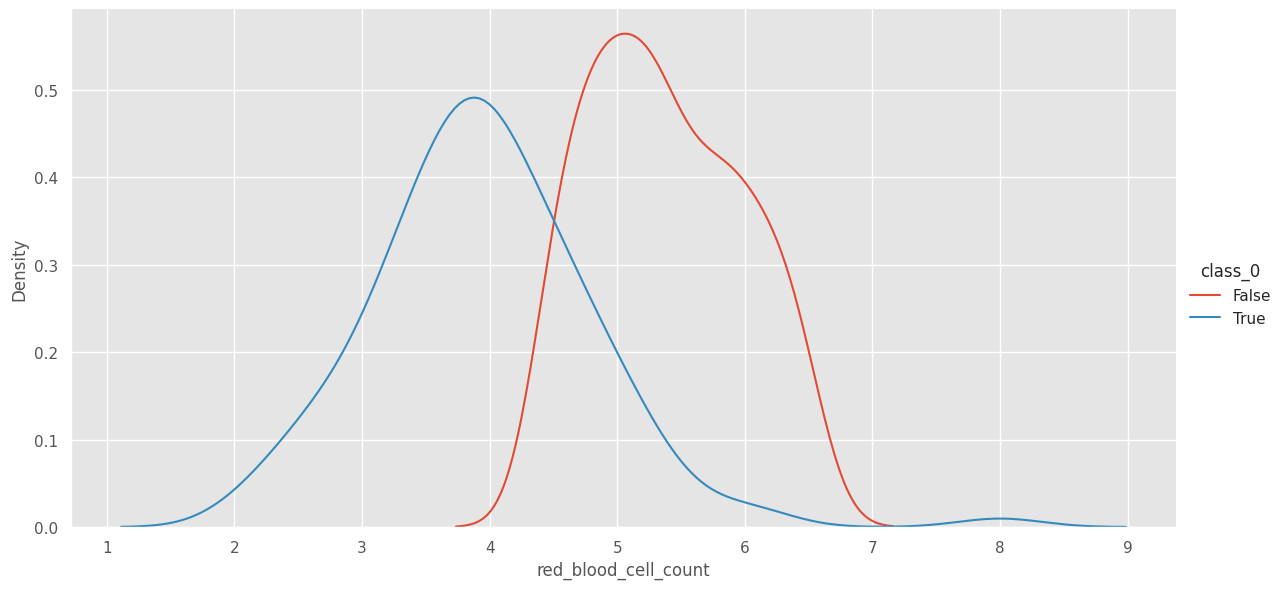

In [ ]:

kde('red_blood_cell_count')  # Call kde function only if 'class' column exists


In [ ]:
# Data Preprocessing

In [ ]:
# checking for missing value
df.isnull().sum().sort_values(ascending=False)

,0
red_blood_cell_count,131
white_blood_cell_count,106
potassium,88
sodium,87
packed_cell_volume,71
haemoglobin,52
sugar,49
specific_gravity,47
albumin,46
blood_glucose_random,44


In [ ]:
df[num_cols].isnull().sum()

,0
age,9
blood_pressure,12
specific_gravity,47
albumin,46
sugar,49
blood_glucose_random,44
blood_urea,19
serum_creatinine,17
sodium,87
potassium,88


In [ ]:
# ... previous code ...

# Store the original cat_cols
cat_cols_original = cat_cols.copy()

# Remove 'class' from cat_cols before creating dummies
cat_cols = [col for col in cat_cols if col != 'class']  # Exclude 'class'

# Check if the columns in cat_cols exist in the DataFrame
cat_cols_to_encode = [col for col in cat_cols if col in df.columns]

# Create dummies only for the columns that exist
df = pd.get_dummies(df, columns=cat_cols_to_encode)  # Create dummies for the remaining cat_cols

# ... (rest of your code)

# Redefine cat_cols after get_dummies to reflect the new columns
# Use cat_cols_original to ensure you are referencing the original categorical column names
# Exclude 'class' here as well
cat_cols = [col for col in df.columns if col.startswith(tuple([c for c in cat_cols_original if c != 'class']))]

df[cat_cols].isnull().sum()

,0
red_blood_cells_abnormal,0
red_blood_cells_normal,0
pus_cell_abnormal,0
pus_cell_normal,0
pus_cell_clumps_notpresent,0
pus_cell_clumps_present,0
bacteria_notpresent,0
bacteria_present,0
hypertension_no,0
hypertension_yes,0


In [ ]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,...,coronary_artery_disease_no,coronary_artery_disease_yes,appetite_good,appetite_poor,peda_edema_no,peda_edema_yes,aanemia_no,aanemia_yes,class_0,class_1
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,...,True,False,True,False,True,False,True,False,True,False
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,...,True,False,True,False,True,False,True,False,True,False
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,...,True,False,False,True,True,False,False,True,True,False
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,True,False,False,True,False,True,False,True,True,False
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,...,True,False,True,False,True,False,True,False,True,False


In [ ]:
# two method
# radom sampling->higer null value
# mean/mode-> lower null value

In [ ]:
def random_sampling(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [ ]:
# random sampling for numerical value
for col in num_cols:
    random_sampling(col)

In [ ]:
df[num_cols].isnull().sum()

,0
age,0
blood_pressure,0
specific_gravity,0
albumin,0
sugar,0
blood_glucose_random,0
blood_urea,0
serum_creatinine,0
sodium,0
potassium,0


In [ ]:
def random_sampling(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [ ]:
import pandas as pd # Import pandas library if not already imported

# Assuming your data is in a CSV file named 'your_data.csv'
df = pd.read_csv('/content/kidney_disease (1).csv')  # Replace 'your_data.csv' with the actual file path

# Now you can proceed with the rest of your code:

# Re-define cat_cols based on the reloaded DataFrame
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
# Now cat_cols contains the correct column names for the current df

df[cat_cols].isnull().sum()  # This should now work without KeyError

,0
rbc,152
pc,65
pcc,4
ba,4
pcv,70
wc,105
rc,130
htn,2
dm,2
cad,2


In [ ]:
# Feature Encoding

In [ ]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()}")

rbc has 2
pc has 2
pcc has 2
ba has 2
pcv has 44
wc has 92
rc has 49
htn has 2
dm has 5
cad has 3
appet has 2
pe has 2
ane has 2
classification has 3


In [ ]:
# label_encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,...,32,72,34,1,4,1,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,...,26,56,49,0,3,1,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,19,70,49,0,4,1,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,20,62,19,1,3,1,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,23,68,27,0,3,1,0,0,0,0


In [ ]:
# Model Building

In [ ]:
# Define cat_cols based on the columns of the DataFrame
cat_cols = [col for col in df.columns if df[col].dtype == 'object']

# Check if 'classification' is in cat_cols before removing it
if 'classification' in cat_cols:
    cat_cols.remove('classification')

# Proceed with one-hot encoding other categorical features
df = pd.get_dummies(df, columns=cat_cols)

# Rename the target column to 'class' if needed
df = df.rename(columns={'classification': 'class'})

# ... (rest of your code)

# Now you can drop 'classification'
# Assuming 'classification' was your original target column name
X = df.drop(['class'], axis=1)  # Drop the target column 'class'
y = df['class']  # Assign the 'class' column to y

In [ ]:
X

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,...,15.4,32,72,34,1,4,1,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,...,11.3,26,56,49,0,3,1,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,9.6,19,70,49,0,4,1,1,0,1
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,11.2,20,62,19,1,3,1,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,11.6,23,68,27,0,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,...,15.7,35,62,30,0,3,1,0,0,0
396,396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,...,16.5,42,72,44,0,3,1,0,0,0
397,397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,...,15.8,37,61,36,0,3,1,0,0,0
398,398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,...,14.2,39,67,41,0,3,1,0,0,0


In [ ]:
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
395,2
396,2
397,2
398,2


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test =  train_test_split(X,y, test_size = 0.2, random_state = 0)

In [ ]:
# KNN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ... (your previous code to load and preprocess data) ...

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')  # or strategy='median', 'most_frequent'
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create and train the KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train_imputed, y_train)  # Use imputed data for training

# Evaluate the model
knn_acc = accuracy_score(y_test, knn.predict(X_test_imputed))  # Use imputed data for prediction
print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train_imputed))}")
print(f"Testing Accuracy of KNN is {accuracy_score(y_test, knn.predict(X_test_imputed))}")

print(f"Confusion Matrix of KNN is \n {confusion_matrix(y_test, knn.predict(X_test_imputed))}\n")
print(f"Classification Report of KNN is \n{classification_report(y_test, knn.predict(X_test_imputed))}")

Training Accuracy of KNN is 0.990625
Testing Accuracy of KNN is 0.975
Confusion Matrix of KNN is 
 [[50  0  1]
 [ 1  0  0]
 [ 0  0 28]]

Classification Report of KNN is 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        51
           1       0.00      0.00      0.00         1
           2       0.97      1.00      0.98        28

    accuracy                           0.97        80
   macro avg       0.65      0.66      0.65        80
weighted avg       0.96      0.97      0.97        80



In [ ]:
# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(f"Training Accuracy of DTC is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Testing Accuracy of DTC is {accuracy_score(y_test, dtc.predict(X_test))}")

print(f"Confusion Matrix of DTC is \n {confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report of DTC is \n{classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of DTC is 1.0
Testing Accuracy of DTC is 0.9875
Confusion Matrix of DTC is 
 [[51  0  0]
 [ 1  0  0]
 [ 0  0 28]]

Classification Report of DTC is 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00        28

    accuracy                           0.99        80
   macro avg       0.66      0.67      0.66        80
weighted avg       0.98      0.99      0.98        80



In [ ]:
# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV

GRID_PARAMETER = {
    'criterion':['gini','entropy'],
    'max_depth':[3,5,7,10],
    'splitter':['best','random'],
    'min_samples_leaf':[1,2,3,5,7],
    'min_samples_split':[1,2,3,5,7],
    'max_features':['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, GRID_PARAMETER, cv=5, n_jobs=-1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
# best paramer and best score
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 7, 'splitter': 'best'}
0.99375


In [ ]:
dtc = grid_search_dtc.best_estimator_

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(f"Training Accuracy of DTC is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Testing Accuracy of DTC is {accuracy_score(y_test, dtc.predict(X_test))}")

print(f"Confusion Matrix of DTC is \n {confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report of DTC is \n{classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of DTC is 0.9875
Testing Accuracy of DTC is 0.95
Confusion Matrix of DTC is 
 [[50  0  1]
 [ 1  0  0]
 [ 2  0 26]]

Classification Report of DTC is 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        51
           1       0.00      0.00      0.00         1
           2       0.96      0.93      0.95        28

    accuracy                           0.95        80
   macro avg       0.64      0.64      0.64        80
weighted avg       0.94      0.95      0.94        80



In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = "gini", max_depth = 10, max_features="sqrt", min_samples_leaf= 1, min_samples_split= 7, n_estimators = 400)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=400)

In [ ]:
rand_clf_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(f"Training Accuracy of Random Forest is {accuracy_score(y_train, rand_clf.predict(X_train))}")
print(f"Testing Accuracy of Random Forest is {accuracy_score(y_test, rand_clf.predict(X_test))}")

print(f"Confusion Matrix of Random Forest is \n {confusion_matrix(y_test, rand_clf.predict(X_test))}\n")
print(f"Classification Report of Random Forest is \n{classification_report(y_test, rand_clf.predict(X_test))}")

Training Accuracy of Random Forest is 0.996875
Testing Accuracy of Random Forest is 0.9875
Confusion Matrix of Random Forest is 
 [[51  0  0]
 [ 1  0  0]
 [ 0  0 28]]

Classification Report of Random Forest is 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00        28

    accuracy                           0.99        80
   macro avg       0.66      0.67      0.66        80
weighted avg       0.98      0.99      0.98        80



In [ ]:
# XgBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(objective="binary:logistic", learning_rate = 0.001, max_depth = 10, n_estimators = 100)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(f"Training Accuracy of XGB is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Testing Accuracy of XGB is {accuracy_score(y_test, xgb.predict(X_test))}")

print(f"Confusion Matrix of XGB is \n {confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report of XGB is \n{classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XGB is 0.996875
Testing Accuracy of XGB is 0.9875
Confusion Matrix of XGB is 
 [[51  0  0]
 [ 1  0  0]
 [ 0  0 28]]

Classification Report of XGB is 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00        28

    accuracy                           0.99        80
   macro avg       0.66      0.67      0.66        80
weighted avg       0.98      0.99      0.98        80



In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
lr_acc = accuracy_score(y_test, lr.predict(X_test))
print(f"Training Accuracy of LR is {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Testing Accuracy of LR is {accuracy_score(y_test, lr.predict(X_test))}")

print(f"Confusion Matrix of LR is \n {confusion_matrix(y_test, lr.predict(X_test))}\n")
print(f"Classification Report of LR is \n{classification_report(y_test, lr.predict(X_test))}")

Training Accuracy of LR is 0.896875
Testing Accuracy of LR is 0.9125
Confusion Matrix of LR is 
 [[48  4]
 [ 3 25]]

Classification Report of LR is 
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        52
           1       0.86      0.89      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.91      0.90        80
weighted avg       0.91      0.91      0.91        80



In [ ]:
# SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm  = SVC(probability=True)

parameter = {
    'gamma':[0.0001, 0.001, 0.01, 0.1],
    'C':[0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(svm, parameter)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 15, 'gamma': 0.0001}
0.765625


In [ ]:
svm  = SVC(gamma = 0.0001, C  = 15, probability=True)
svm.fit(X_train, y_train)

SVC(C=15, gamma=0.0001, probability=True)

In [ ]:
svm_acc = accuracy_score(y_test, svm.predict(X_test))
print(f"Training Accuracy of SVC is {accuracy_score(y_train, svm.predict(X_train))}")
print(f"Testing Accuracy of SVC is {accuracy_score(y_test, svm.predict(X_test))}")

print(f"Confusion Matrix of SVC is \n {confusion_matrix(y_test, svm.predict(X_test))}\n")
print(f"Classification Report of SVC is \n{classification_report(y_test, svm.predict(X_test))}")

Training Accuracy of SVC is 0.9875
Testing Accuracy of SVC is 0.7375
Confusion Matrix of SVC is 
 [[38 14]
 [ 7 21]]

Classification Report of SVC is 
              precision    recall  f1-score   support

           0       0.84      0.73      0.78        52
           1       0.60      0.75      0.67        28

    accuracy                           0.74        80
   macro avg       0.72      0.74      0.73        80
weighted avg       0.76      0.74      0.74        80



In [ ]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

PARAMETERS = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate':[0.001, 0.1, 1, 10],
    'n_estimators':[100,150,180, 200]
}
grid_search_gbc = GridSearchCV(gbc, PARAMETERS, cv=5, n_jobs=-1, verbose= 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['log_loss', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [ ]:
print(grid_search_gbc.best_params_)

{'learning_rate': 0.1, 'loss': 'log_loss', 'n_estimators': 100}


In [ ]:
print(grid_search_gbc.best_score_)

0.975


In [ ]:
gbc = GradientBoostingClassifier(learning_rate= 0.1, loss = 'log_loss', n_estimators = 100)
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print(f"Training Accuracy of GBC is {accuracy_score(y_train, gbc.predict(X_train))}")
print(f"Testing Accuracy of GBC is {accuracy_score(y_test, gbc.predict(X_test))}")

print(f"Confusion Matrix of GBC is \n {confusion_matrix(y_test, gbc.predict(X_test))}\n")
print(f"Classification Report of GBC is \n{classification_report(y_test, gbc.predict(X_test))}")

Training Accuracy of GBC is 1.0
Testing Accuracy of GBC is 0.975
Confusion Matrix of GBC is 
 [[52  0]
 [ 2 26]]

Classification Report of GBC is 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        52
           1       1.00      0.93      0.96        28

    accuracy                           0.97        80
   macro avg       0.98      0.96      0.97        80
weighted avg       0.98      0.97      0.97        80



In [ ]:
# Model Comparison

models = pd.DataFrame({
    'Model':['Logistic Regression', 'KNN', 'SVM', 'DT', 'Random Forest Classifier', 'XgBoost','Gradient Boosting'],
    'Score':[lr_acc, knn_acc, svm_acc, dtc_acc, rand_clf_acc, xgb_acc, gbc_acc]
})

models.sort_values(by='Score', ascending = False)

,Model,Score
3,DT,0.9750
4,Random Forest Classifier,0.9750
5,XgBoost,0.9750
6,Gradient Boosting,0.9750
0,Logistic Regression,0.9125
2,SVM,0.7375
1,KNN,0.6375


In [ ]:
import pickle
model = dtc
pickle.dump(model, open("kindey.pkl", 'wb'))

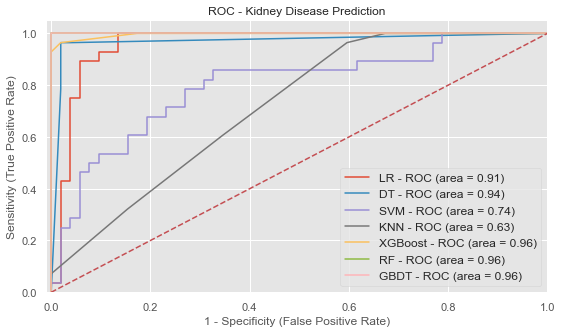

In [ ]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svm,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Kidney Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_kidney.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

[91.25, 97.5, 73.75, 63.74999999999999, 97.5, 97.5, 97.5]
[90.8, 96.28999999999999, 74.03999999999999, 63.05, 96.43, 96.43, 96.43]


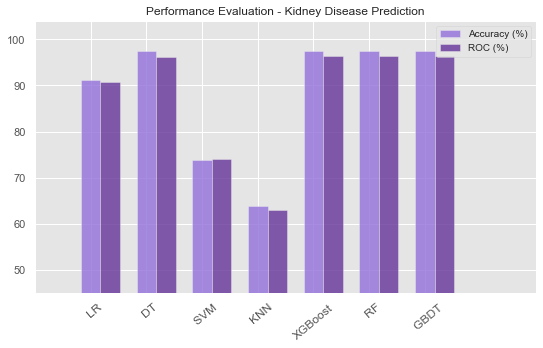

In [ ]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svm,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(lr_acc,4), 100*round(dtc_acc,4), 100*round(svm_acc,4), 100*round(knn_acc,4), 100*round(xgb_acc,4),
                  100*round(rand_clf_acc,4), 100*round(gbc_acc,4)]

for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)


n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)


fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([45, 104])

plt.title('Performance Evaluation - Kidney Disease Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_kidney.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()